# Example

## Clustering

### Data Preparation

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

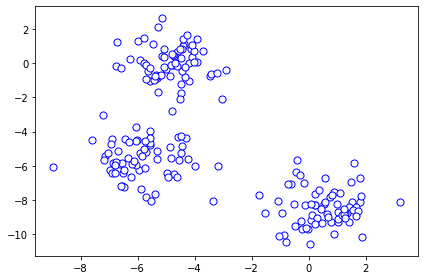

In [2]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.0, shuffle=True)
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolors='blue',s=50)
plt.tight_layout()
plt.show()

### K-means Algorithm

In [3]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, tol=1e-6)
y_KM = KM.fit_predict(X) 

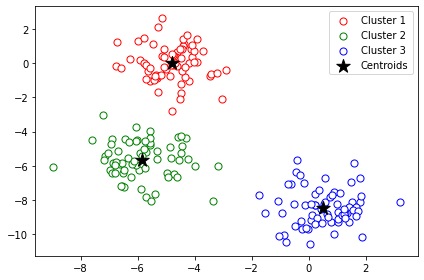

In [4]:
plt.scatter(X[y_KM==0,0],X[y_KM==0,1],s=50,c='white',edgecolor='r',label='Cluster 1')
plt.scatter(X[y_KM==1,0],X[y_KM==1,1],s=50,c='white',edgecolor='g',label='Cluster 2')
plt.scatter(X[y_KM==2,0],X[y_KM==2,1],s=50,c='white',edgecolor='b',label='Cluster 3')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=200,marker='*',c='black',label='Centroids')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

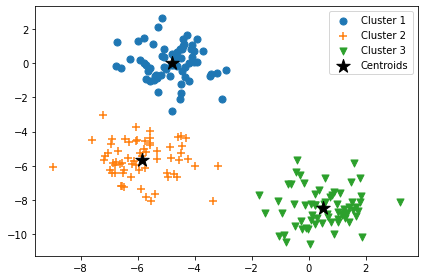

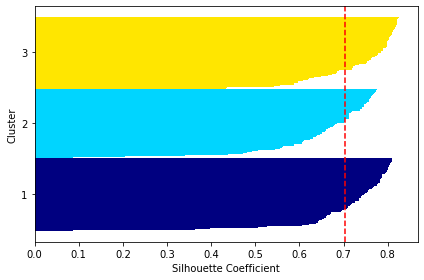

In [5]:
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

y_km = KM.fit_predict(X)

plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,marker='o',label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,marker='+',label='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,marker='v',label='Cluster 3')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=200,marker='*',c='black',label='Centroids')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show() 

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

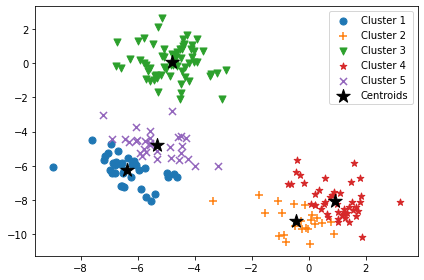

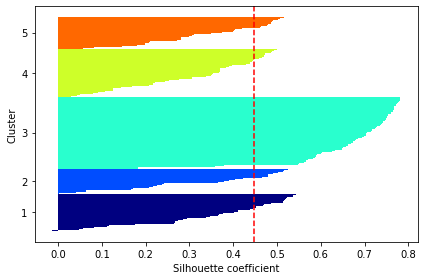

In [6]:
km = KMeans(n_clusters=5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,marker='o',label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,marker='+',label='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,marker='v',label='Cluster 3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=50,marker='*',label='Cluster 4')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=50,marker='x',label='Cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,marker='*',c='black',label='Centroids')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### Gaussian Mixture Models

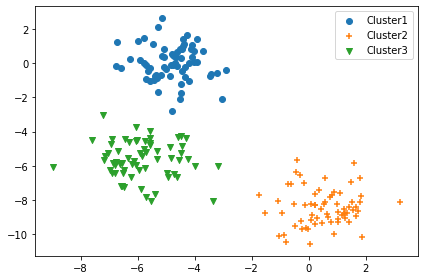

In [7]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(3).fit(X)
classes = model.predict(X)

mk = ['o','+','v']
for i in np.arange(3):
  j = (classes==i)
  plt.scatter(X[j,0],X[j,1],marker=mk[i],label='Cluster'+str(i+1))
plt.tight_layout()
plt.legend()
plt.show()